# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df[df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()

print(duplicate_mice_ids)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df_duplicates = df[df.duplicated(["Mouse ID", "Timepoint"])]
df_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df[df["Mouse ID"] != 'g989']
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = cleaned_df.groupby("Drug Regimen")
tumor_mean = summary_df["Tumor Volume (mm3)"].mean()
tumor_median = summary_df["Tumor Volume (mm3)"].median()
tumor_variance = summary_df["Tumor Volume (mm3)"].var()
tumor_std = summary_df["Tumor Volume (mm3)"].std()
tumor_sem = summary_df["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Mediam Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Srd. Err.": tumor_sem
})
drug_df

,Mean Tumor Volume,Mediam Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Srd. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line.
drug_df_agg = pd.DataFrame({
    "Mean": tumor_mean,
    "Median": tumor_median,
    "Var": tumor_variance,
    "Std": tumor_std,
    "Sem": tumor_sem
})

pd.concat([pd.concat([drug_df_agg], keys=["Tumor Volume (mm3)"], axis=1)])


Tumor Volume (mm3)                                          
                           Mean     Median        Var       Std       Sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

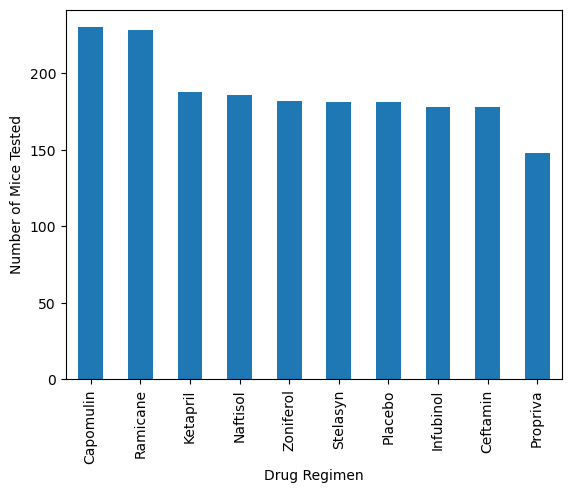

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = cleaned_df["Drug Regimen"].value_counts().plot.bar(width=0.5)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Mice Tested")

<BarContainer object of 10 artists>

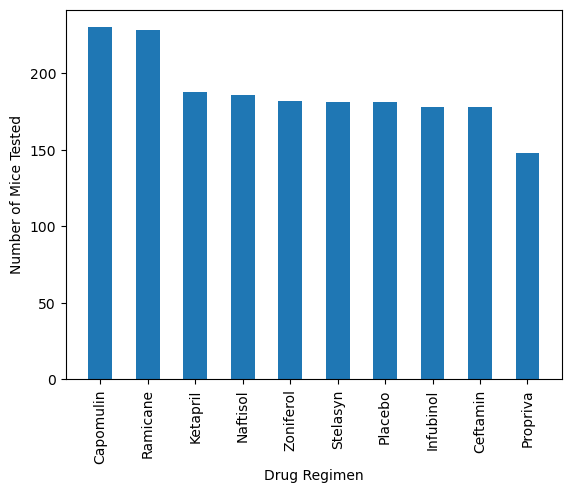

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = cleaned_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(counts))
tick_locs = [value for value in x_axis]
plt.xticks(tick_locs, counts.index.values, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.bar(x_axis, counts, width=0.5)

<Axes: ylabel='Sex'>

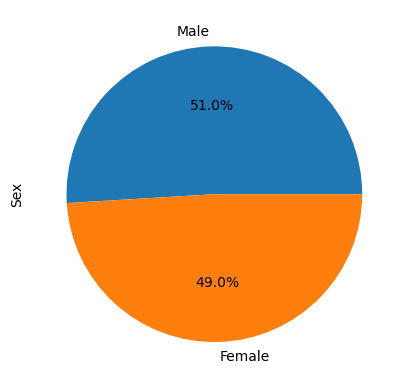

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot = cleaned_df["Sex"].value_counts().plot.pie(autopct="%1.1f%%")
pie_plot

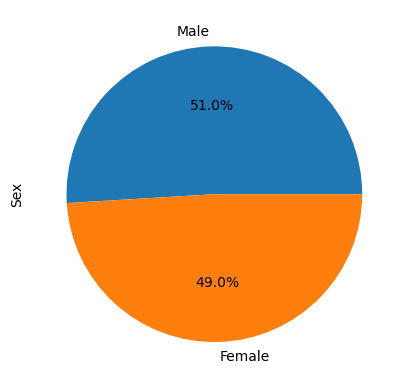

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = cleaned_df["Sex"].value_counts()
plt.ylabel("Sex")
plt.pie(sex_counts, labels=["Male", "Female"], autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(cleaned_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df

# Merge max timepoint onto data_df
merged_df = pd.merge(cleaned_df, max_tp_df, on='Mouse ID')
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [14]:
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_values = []

for drug in drugs:
    
    temp_df = merged_df.loc[merged_df["Drug Regimen"] == drug]

    final_volume_df = temp_df.loc[temp_df["Timepoint"] == temp_df["max_timepoint"]]
    
    values = final_volume_df["Tumor Volume (mm3)"]
    drug_values.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The inner quartile range for {drug} is {iqr}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The lower bound for {drug} is {lower_bound}")
    print(f"The upper bound for {drug} is {upper_bound}")
    
    outliers_count = (values.loc[(final_volume_df["Tumor Volume (mm3)"] >= upper_bound) | (final_volume_df["Tumor Volume (mm3)"] <= lower_bound)]).count()
    print(f"Number of {drug} outliers is {outliers_count}\n")
    

The inner quartile range for Capomulin is 7.781863460000004
The lower bound for Capomulin is 20.70456164999999
The upper bound for Capomulin is 51.83201549
Number of Capomulin outliers is 0

The inner quartile range for Ramicane is 9.098536719999998
The lower bound for Ramicane is 17.912664470000003
The upper bound for Ramicane is 54.30681135
Number of Ramicane outliers is 0

The inner quartile range for Infubinol is 11.477135160000003
The lower bound for Infubinol is 36.83290494999999
The upper bound for Infubinol is 82.74144559000001
Number of Infubinol outliers is 1

The inner quartile range for Ceftamin is 15.577752179999997
The lower bound for Ceftamin is 25.355449580000002
The upper bound for Ceftamin is 87.66645829999999
Number of Ceftamin outliers is 0



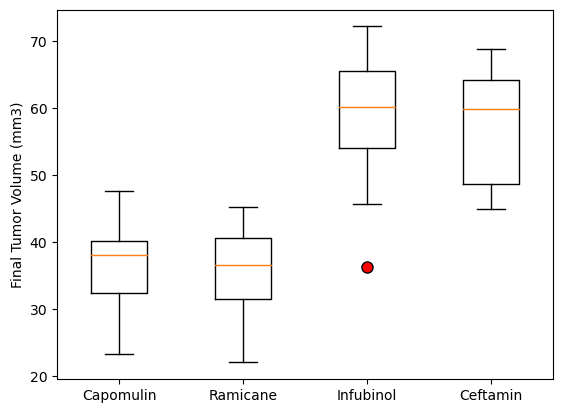

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(drug_values, labels=drugs, flierprops={"marker":"o", "markerfacecolor":"red", "markersize": 8})
plt.show()


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

